In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


# Cole's variables to analyze:
budget

homepage

original_language

overview

poster_path

production_countries

runtime

status

title

cast

revenue



In [7]:
#Load in the data
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [8]:
train.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [9]:
print(train.shape, test.shape)

(3000, 23) (4398, 22)


In [10]:
print("Training set missing values:\n", train.isna().sum())
print("\nTest set missing values:\n", test.isna().sum())

Training set missing values:
 id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Test set missing values:
 id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0


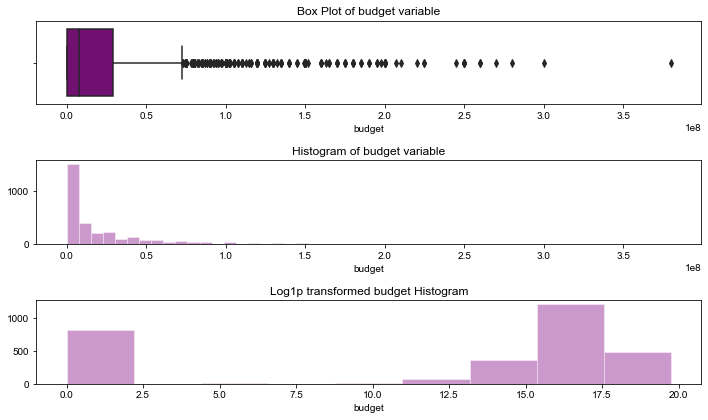

In [11]:
#budget
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.budget, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of budget variable")
sns.distplot(a=train.budget, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of budget variable")
sns.distplot(a=np.log1p(train.budget), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed budget Histogram")
f.tight_layout()

train["log_budget"] = np.log1p(train.budget)
test["log_budget"] = np.log1p(test.budget)

The distribution on budget in the training set is heavily skewed, so we perform a log1p transform to make the distribution more normal

Movies missing a homepage: 2054


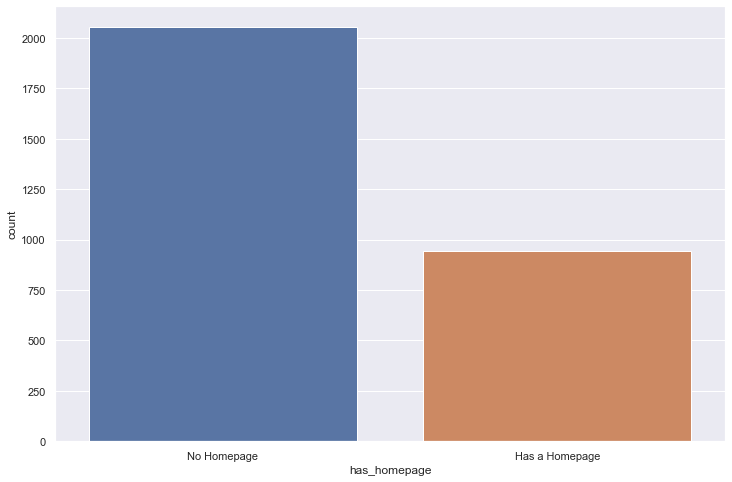

In [12]:
#homepage
print('Movies missing a homepage:',train.homepage.isna().sum())

train['has_homepage'] = train.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)

#recoded variable to be a dummy variable, not sure if plot is needed (maybe pie chart) or what analysis to do

ax = sns.countplot(data = train, x = 'has_homepage').set_xticklabels(labels = ["No Homepage","Has a Homepage"])

col_0,count
original_language,
ar,1
bn,1
cn,20
cs,1
da,5
de,18
el,1
en,2575
es,43


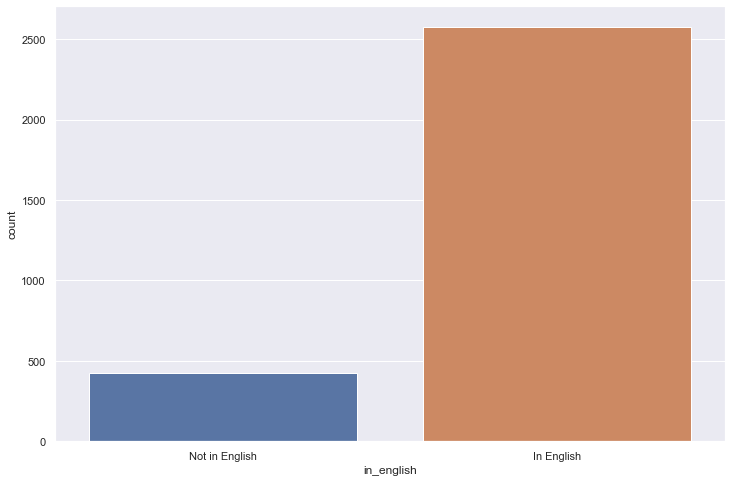

In [13]:
#original_language

# since overwhelming majority of movies is originally in english, 
# we will create a new variable representing if the movie is english or not
train['in_english'] = train.original_language.apply(lambda x: 1 if x == 'en' else 0)
ax = sns.countplot(data = train, x = 'in_english').set_xticklabels(labels = ["Not in English","In English"])

my_tab = pd.crosstab(index=train['original_language'],  # Make a crosstab
                              columns="count") 

my_tab

Movies missing an overview: 8


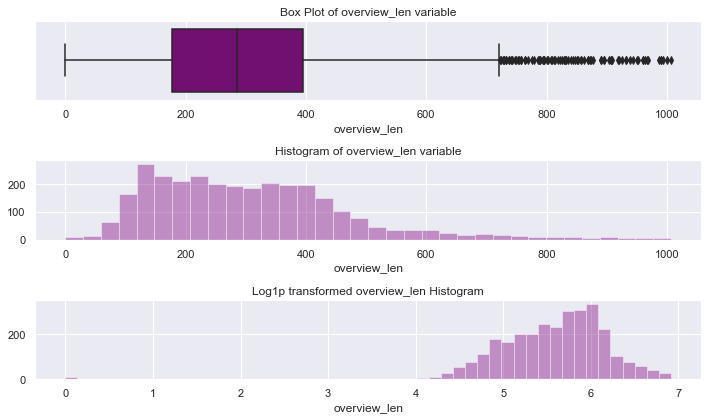

In [14]:
#overview
print('Movies missing an overview:',train.overview.isna().sum())

train.overview = train.overview.fillna("")

train['overview_len'] = train.overview.apply(len)

f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.overview_len, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of overview_len variable")
sns.distplot(a=train.overview_len, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of overview_len variable")
sns.distplot(a=np.log1p(train.overview_len), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed overview_len Histogram")
f.tight_layout()

In [15]:
#poster_path
print('Movies missing a poster path:',train.poster_path.isna().sum())

train['has_poster_path'] = train.poster_path.apply(lambda x: 0 if pd.isnull(x) else 1)

#recoded variable to be a dummy variable, not sure if plot is needed (maybe pie chart) or what analysis to do

my_tab = pd.crosstab(index=train['has_poster_path'],  # Make a crosstab
                              columns="count") 
my_tab

Movies missing a poster path: 1


col_0,count
has_poster_path,
0,1
1,2999


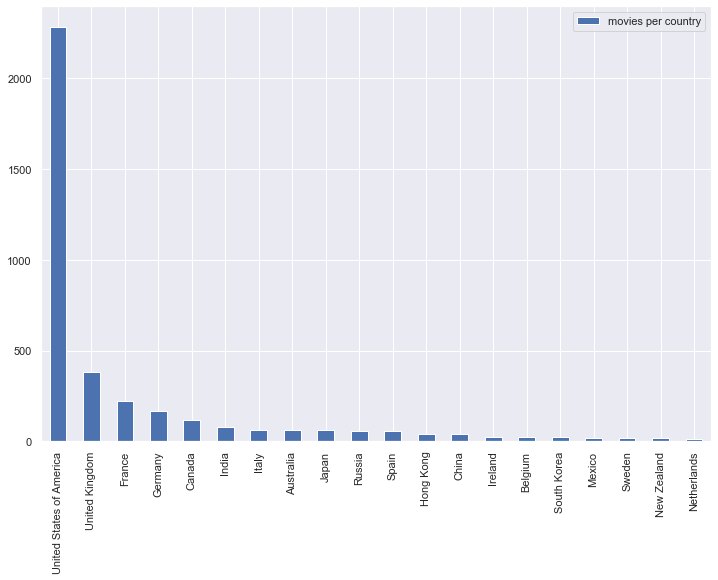

In [16]:
#production_countries


#pre-processing
train.production_countries = train.production_countries.fillna("")
train['production_countries_processed'] = train['production_countries'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))


# not sure what all to do with this yet...
# number of production countries, if it is major production country

countriesDict = {}
for element in train["production_countries_processed"].values:
    for country in element:
        if country not in countriesDict:
            countriesDict[country] = 1
        else:
            countriesDict[country] += 1

countries_df = pd.DataFrame.from_dict(countriesDict, orient='index', columns=["movies per country"])
countries_df.sort_values(by="movies per country", ascending=False).head(20).plot.bar()

Movies missing a runtime: 2


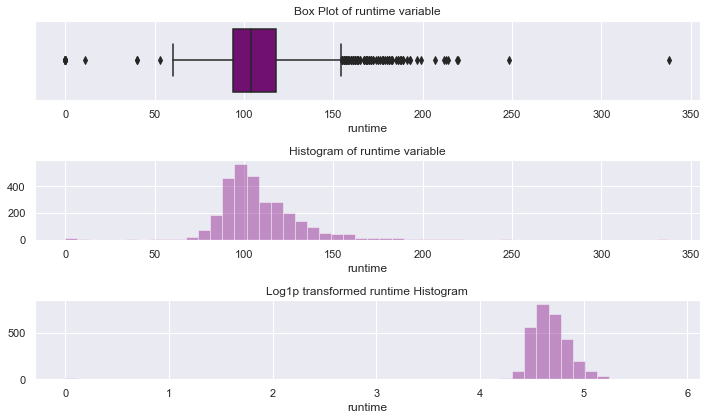

In [17]:
#runtime
print('Movies missing a runtime:',train.runtime.isna().sum())


f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.runtime, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of runtime variable")
sns.distplot(a=train.runtime, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of runtime variable")
sns.distplot(a=np.log1p(train.runtime), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed runtime Histogram")
f.tight_layout()

In [18]:
#status
print(train.status.unique())

print(train.status.value_counts())

# because the vast majority of movies in both the training and the test sets are already released
# AND we are predicting the box office success, so it doesn't matter if the movie is out or not, 
# we likely can drop this col

my_tab = pd.crosstab(index=train.status,  # Make a crosstab
                              columns="count") 
my_tab

['Released' 'Rumored']
Released    2996
Rumored        4
Name: status, dtype: int64


col_0,count
status,
Released,2996
Rumored,4


Movies missing a title: 0


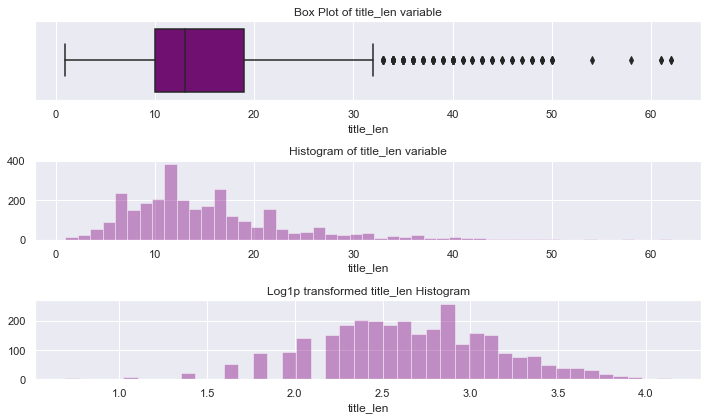

In [19]:
#title
print('Movies missing a title:',train.title.isna().sum())


train['title_len'] = train.title.apply(len)

f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.title_len, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of title_len variable")
sns.distplot(a=train.title_len, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of title_len variable")
sns.distplot(a=np.log1p(train.title_len), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed title_len Histogram")
f.tight_layout()

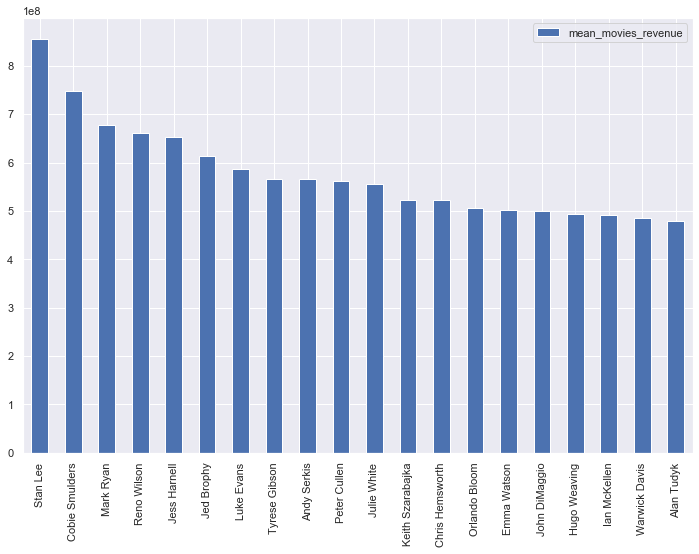

In [20]:
#cast
train.cast = train.cast.fillna("")
train['cast_processed'] = train['cast'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

actorsDict = {}
for element in train[["revenue", "cast_processed"]].values:
    
    for actor in element[1]:
        if actor not in actorsDict:
            actorsDict[actor] = [element[0], 1]
        else:
            actorsDict[actor][0] += element[0]
            actorsDict[actor][1] += 1    

actorsDict = {k: v for k, v in actorsDict.items() if v[1] >= 5}

for actor in actorsDict:
    actorsDict[actor][0] = actorsDict[actor][0]/actorsDict[actor][1]
    actorsDict[actor] = actorsDict[actor][0]


    
    
actors_df = pd.DataFrame.from_dict(actorsDict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar()



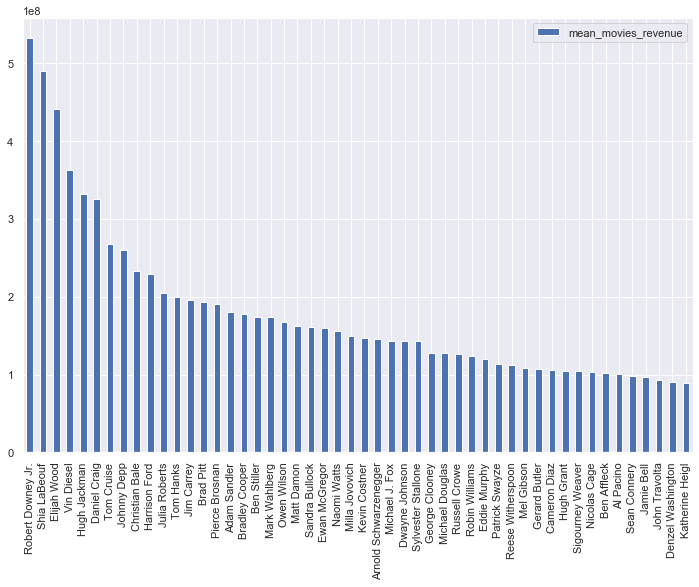

In [21]:
#cast
train.cast = train.cast.fillna("")
train['cast_processed'] = train['cast'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

actorsDict = {}
for element in train[["revenue", "cast_processed"]].values:
   # compare results when looking at x top actors in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in actorsDict:
            actorsDict[element[1][i]] = [element[0], 1]
        else:
            actorsDict[element[1][i]][0] += element[0]
            actorsDict[element[1][i]][1] += 1    

actorsDict = {k: v for k, v in actorsDict.items() if v[1] >= 5}

for actor in actorsDict:
    actorsDict[actor][0] = actorsDict[actor][0]/actorsDict[actor][1]
    actorsDict[actor] = actorsDict[actor][0]


    
    
actors_df = pd.DataFrame.from_dict(actorsDict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(50).plot.bar()


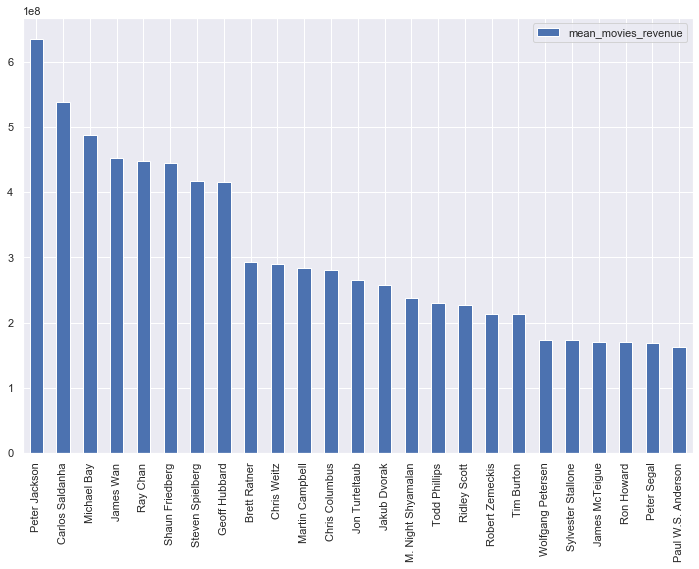

In [22]:
#directors
train.crew = train.crew.fillna("")
train['directors'] = train['crew'].apply(lambda x: re.findall("Director\', \'name': \'(.+?)\'", x))

directorsDict = {}
for element in train[["revenue", "directors"]].values:
    
    for director in element[1]:
        if director not in directorsDict:
            directorsDict[director] = [element[0], 1]
        else:
            directorsDict[director][0] += element[0]
            directorsDict[director][1] += 1    

directorsDict = {k: v for k, v in directorsDict.items() if v[1] >= 5}

for director in directorsDict:
    directorsDict[director][0] = directorsDict[director][0]/directorsDict[director][1]
    directorsDict[director] = directorsDict[director][0]


    
    
directors_df = pd.DataFrame.from_dict(directorsDict, orient='index', columns=["mean_movies_revenue"])
directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar()

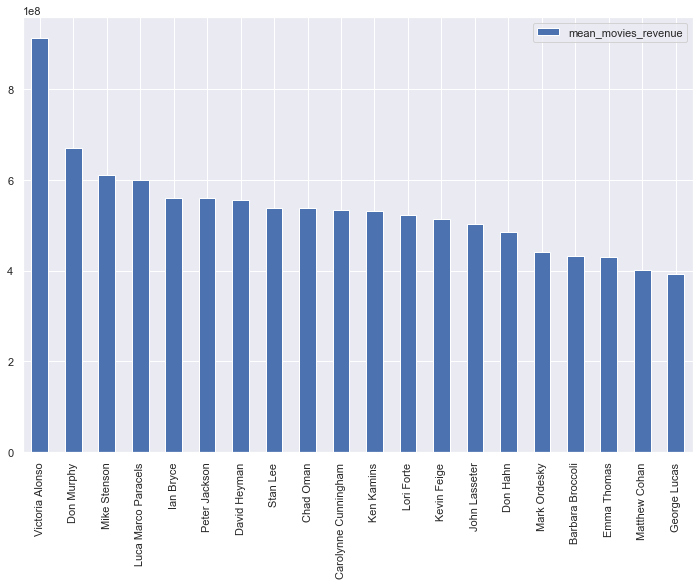

In [23]:
#producers
train.crew = train.crew.fillna("")
train['producers'] = train['crew'].apply(lambda x: re.findall("Producer\', \'name': \'(.+?)\'", x))

producersDict = {}
for element in train[["revenue", "producers"]].values:
    
    for producer in element[1]:
        if producer not in producersDict:
            producersDict[producer] = [element[0], 1]
        else:
            producersDict[producer][0] += element[0]
            producersDict[producer][1] += 1    

producersDict = {k: v for k, v in producersDict.items() if v[1] >= 5}

for producer in producersDict:
    producersDict[producer][0] = producersDict[producer][0]/producersDict[producer][1]
    producersDict[producer] = producersDict[producer][0]


    
    
producers_df = pd.DataFrame.from_dict(producersDict, orient='index', columns=["mean_movies_revenue"])
producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar()

Movies missing revenue: 0


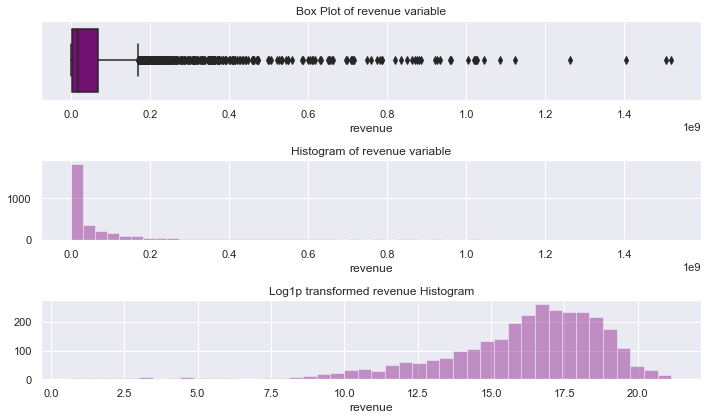

In [24]:
#revenue
print('Movies missing revenue:',train.revenue.isna().sum())


f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.revenue, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of revenue variable")
sns.distplot(a=train.revenue, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of revenue variable")
sns.distplot(a=np.log1p(train.revenue), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()